In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day27-one-hot-encoding/cars.csv')
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [3]:
df.isnull().sum()

brand            0
km_driven        0
fuel             0
owner            0
selling_price    0
dtype: int64

In [15]:
df.fuel.value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [5]:
df.owner.value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

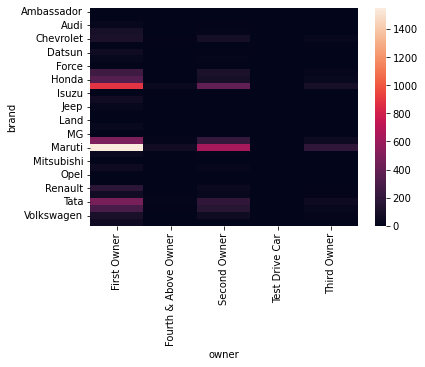

In [6]:
sns.heatmap(pd.crosstab(df.brand, df.owner))

## 1. OneHotEncoding using Pandas

In [8]:
# one hot encoding for fuel and owner using pandas
pd.get_dummies(df,columns=['fuel','owner']).head()

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,0,1,0,0,1,0,0,0,0
1,Skoda,120000,370000,0,1,0,0,0,0,1,0,0
2,Honda,140000,158000,0,0,0,1,0,0,0,0,1
3,Hyundai,127000,225000,0,1,0,0,1,0,0,0,0
4,Maruti,120000,130000,0,0,0,1,1,0,0,0,0


## 2. K-1 OneHotEncoding

In [9]:
# one hot encoding for fuel and owner and droping first columns from both fuel and owner
pd.get_dummies(df,columns=['fuel','owner'], drop_first=True).head()

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,1,0,0,0,0,0,0
1,Skoda,120000,370000,1,0,0,0,1,0,0
2,Honda,140000,158000,0,0,1,0,0,0,1
3,Hyundai,127000,225000,1,0,0,0,0,0,0
4,Maruti,120000,130000,0,0,1,0,0,0,0


# 3. OneHotEncoding using Sklearn
For ML we use one hot encoding from sklearn

In [10]:
df.head(4)

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:4],df.iloc[:,-1],test_size=0.2,random_state=2)

In [13]:
X_train.head(4)

,brand,km_driven,fuel,owner
5571,Hyundai,35000,Diesel,First Owner
2038,Jeep,60000,Diesel,First Owner
2957,Hyundai,25000,Petrol,First Owner
7618,Mahindra,130000,Diesel,Second Owner


In [14]:
X_test.head(4)

,brand,km_driven,fuel,owner
606,Hyundai,80000,Petrol,First Owner
7575,Mahindra,70000,Diesel,Second Owner
7705,Toyota,68089,Petrol,First Owner
4305,Hyundai,70000,Petrol,Second Owner


In [16]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first',sparse=False,dtype=np.int32)

In [20]:
# fit and transform X_train of owner and fuel
X_train_new = ohe.fit_transform(X_train[['fuel','owner']])

In [21]:
# transform X_test of owner and fuel
X_test_new = ohe.transform(X_test[['fuel','owner']])

In [22]:
# cut (brand,km_driven) of X_train and append with (fuel,owner) of X_train_new
X_train.head(4)

,brand,km_driven,fuel,owner
5571,Hyundai,35000,Diesel,First Owner
2038,Jeep,60000,Diesel,First Owner
2957,Hyundai,25000,Petrol,First Owner
7618,Mahindra,130000,Diesel,Second Owner


In [23]:
X_train_new

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [26]:
# theseare in array format so we can append X_rain_new with this
X_train[['brand','km_driven']].values

array([['Hyundai', 35000],
       ['Jeep', 60000],
       ['Hyundai', 25000],
       ...,
       ['Tata', 15000],
       ['Maruti', 32500],
       ['Isuzu', 121000]], dtype=object)

In [24]:
# append np.array values horzintal manner
np.hstack((X_train[['brand','km_driven']].values,X_train_new))

array([['Hyundai', 35000, 1, ..., 0, 0, 0],
       ['Jeep', 60000, 1, ..., 0, 0, 0],
       ['Hyundai', 25000, 0, ..., 0, 0, 0],
       ...,
       ['Tata', 15000, 0, ..., 0, 0, 0],
       ['Maruti', 32500, 1, ..., 1, 0, 0],
       ['Isuzu', 121000, 1, ..., 0, 0, 0]], dtype=object)

In [28]:
np.hstack((X_train[['brand','km_driven']].values,X_train_new)).shape

(6502, 9)

## 4. OneHotEncoding with Top Categorie

In [33]:
count = df.brand.value_counts()

In [34]:
df.brand.unique()
threshold = 100

In [38]:
re = df.brand.value_counts()[df.brand.value_counts() <= threshold].index
re

Index(['Nissan', 'Jaguar', 'Volvo', 'Datsun', 'Mercedes-Benz', 'Fiat', 'Audi',
       'Lexus', 'Jeep', 'Mitsubishi', 'Force', 'Land', 'Isuzu', 'Kia',
       'Ambassador', 'Daewoo', 'MG', 'Ashok', 'Opel', 'Peugeot'],
      dtype='object')

In [40]:
pd.get_dummies(df.brand.replace(re, 'others')).sample(10)

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,others
2880,0,0,1,0,0,0,0,0,0,0,0,0,0
5577,0,0,0,0,0,0,1,0,0,0,0,0,0
2391,0,0,0,0,0,0,0,0,0,1,0,0,0
5092,0,0,0,0,0,0,0,0,0,0,1,0,0
4294,0,0,0,0,1,0,0,0,0,0,0,0,0
1514,0,0,0,1,0,0,0,0,0,0,0,0,0
6878,0,0,0,0,0,1,0,0,0,0,0,0,0
112,0,0,0,0,1,0,0,0,0,0,0,0,0
5115,0,0,0,1,0,0,0,0,0,0,0,0,0
3546,0,0,0,1,0,0,0,0,0,0,0,0,0
